In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import glob
import os.path
pd.set_option('display.max_columns', None)

In [2]:
dfs = []

for path in glob.glob("rteu/mof-rts-*_rteu_bearings.csv"):
    _, fname = os.path.split(path)
    station, ts, _ = fname.split("_")
    
    df = pd.read_csv(path, parse_dates=["date.time"])
    df["Station"] = station
    df["bearing_error"] = df["real_bearing"] - df["bearings_filtered_linear"]
    dfs.append(df)

rteu = pd.concat(dfs)
rteu

Unnamed: 0  type           date.time   latitude  longitude  accuracy.m.  \
0            51  True 2021-04-15 10:43:33  50.838471   8.673685            4   
1            61  True 2021-04-15 10:43:55  50.838653   8.673290            4   
2            62  True 2021-04-15 10:43:56  50.838657   8.673286            4   
3            63  True 2021-04-15 10:43:58  50.838666   8.673271            4   
4            65  True 2021-04-15 10:44:00  50.838677   8.673239            4   
..          ...   ...                 ...        ...        ...          ...   
837        1874  True 2021-04-15 11:15:28  50.841369   8.674043            3   
838        1875  True 2021-04-15 11:15:29  50.841369   8.674034            3   
839        2060  True 2021-04-15 11:25:00  50.838840   8.672945            4   
840        2067  True 2021-04-15 11:25:12  50.838779   8.673073            4   
841        2072  True 2021-04-15 11:25:54  50.838530   8.673663            5   

     altitude.m.  geoid_height.m.  speed.m.s.  bearing.deg.  sat_used  \
0          410.4              NaN       2.210           282        22   
1          416.4              NaN       0.154           302        22   
2          415.3              NaN       0.118           302        22   
3          415.7              NaN       0.384           302        22   
4          415.8              NaN       1.091           274        22   
..           ...              ...         ...           ...       ...   
837        346.0              NaN       0.348           300        25   
838        346.2              NaN       0.593           298        25   
839        410.5              NaN       0.992           137        22   
840        414.9              NaN       1.293            92        22   
841        410.6              NaN       0.322           114        21   

     sat_inview name desc             gps_time             time_gps  \
0            32  NaN  NaN  2021-04-15 10:43:33  2021-04-15 10:43:33   
1            32  NaN  NaN  2021-04-15 10:43:55  2021-04-15 10:43:55   
2            32  NaN  NaN  2021-04-15 10:43:56  2021-04-15 10:43:56   
3            32  NaN  NaN  2021-04-15 10:43:58  2021-04-15 10:43:58   
4            32  NaN  NaN  2021-04-15 10:44:00  2021-04-15 10:44:00   
..          ...  ...  ...                  ...                  ...   
837          30  NaN  NaN  2021-04-15 11:15:28  2021-04-15 11:15:28   
838          30  NaN  NaN  2021-04-15 11:15:29  2021-04-15 11:15:29   
839          31  NaN  NaN  2021-04-15 11:25:00  2021-04-15 11:25:00   
840          31  NaN  NaN  2021-04-15 11:25:12  2021-04-15 11:25:12   
841          31  NaN  NaN  2021-04-15 11:25:54  2021-04-15 11:25:54   

               timestamp        station          0   1          2          3  \
0    2021-04-15 10:43:33  mof-rts-00011        NaN NaN  20.968796  22.819012   
1    2021-04-15 10:43:55  mof-rts-00011        NaN NaN  23.910320  20.687115   
2    2021-04-15 10:43:56  mof-rts-00011        NaN NaN  21.629845  20.910992   
3    2021-04-15 10:43:58  mof-rts-00011        NaN NaN  22.182243  20.890713   
4    2021-04-15 10:44:00  mof-rts-00011        NaN NaN  22.731609  22.543194   
..                   ...            ...        ...  ..        ...        ...   
837  2021-04-15 11:15:28  mof-rts-00003  24.304691 NaN        NaN  22.351608   
838  2021-04-15 11:15:29  mof-rts-00003  23.564316 NaN        NaN  21.744690   
839  2021-04-15 11:25:00  mof-rts-00003        NaN NaN  20.087639  23.269547   
840  2021-04-15 11:25:12  mof-rts-00003        NaN NaN  20.337273  21.125809   
841  2021-04-15 11:25:54  mof-rts-00003        NaN NaN  22.488937  21.757965   

     lead  second_antenna  third_antenna     delta      linear        acos  \
0       3               2              0 -0.088106  228.964749  227.527314   
1       2               3              0  0.153486  218.093132  220.585501   
2       2               3              0  0.034231  223.459601  224.019160   
3       2               3              0 

In [3]:
dfs = []

for path in glob.glob("tRackIT/mof-rts-*_tRackIT_bearings.csv"):
    _, fname = os.path.split(path)
    station, ts, _ = fname.split("_")
    
    df = pd.read_csv(path, parse_dates=["date.time"])
    df["Station"] = station
    df["bearing_error"] = ((df["real_bearing"] - df["bearings_filtered_linear"] + 180) % 360) - 180
    dfs.append(df)

trackit = pd.concat(dfs)
trackit

Unnamed: 0  type           date.time   latitude  longitude  accuracy.m.  \
0          1562  True 2021-04-14 14:05:59  50.837819   8.672914            4   
1          1563  True 2021-04-14 14:06:00  50.837819   8.672938            4   
2          1570  True 2021-04-14 14:06:40  50.837777   8.673727            4   
3          1637  True 2021-04-14 14:10:01  50.838006   8.674919            4   
4          1638  True 2021-04-14 14:10:02  50.838021   8.674908            4   
..          ...   ...                 ...        ...        ...          ...   
987        4653  True 2021-04-14 14:51:23  50.838491   8.673727            3   
988        4656  True 2021-04-14 14:51:26  50.838481   8.673790            3   
989        4658  True 2021-04-14 14:51:29  50.838469   8.673844            3   
990        4659  True 2021-04-14 14:51:30  50.838463   8.673863            3   
991        4706  True 2021-04-14 14:52:29  50.838047   8.674731            4   

     altitude.m.  geoid_height.m.  speed.m.s.  bearing.deg.  sat_used  \
0          440.2              NaN       1.069            91        18   
1          439.6              NaN       1.364            99        18   
2          441.3              NaN       1.336           114        19   
3          431.0              NaN       2.213           332        18   
4          430.7              NaN       2.176           335        18   
..           ...              ...         ...           ...       ...   
987        411.3              NaN       0.937           118        20   
988        410.4              NaN       1.377           101        20   
989        410.2              NaN       1.472           112        19   
990        410.1              NaN       1.251           114        19   
991        407.9              NaN       1.391           152        21   

     sat_inview  name  desc             gps_time             time_gps  \
0            29   NaN   NaN  2021-04-14 14:05:59  2021-04-14 14:05:59   
1            29   NaN   NaN  2021-04-14 14:06:00  2021-04-14 14:06:00   
2            30   NaN   NaN  2021-04-14 14:06:40  2021-04-14 14:06:40   
3            29   NaN   NaN  2021-04-14 14:10:01  2021-04-14 14:10:00   
4            29   NaN   NaN  2021-04-14 14:10:02  2021-04-14 14:10:01   
..          ...   ...   ...                  ...                  ...   
987          31   NaN   NaN  2021-04-14 14:51:23  2021-04-14 14:51:23   
988          31   NaN   NaN  2021-04-14 14:51:26  2021-04-14 14:51:26   
989          31   NaN   NaN  2021-04-14 14:51:29  2021-04-14 14:51:29   
990          31   NaN   NaN  2021-04-14 14:51:30  2021-04-14 14:51:30   
991          32   NaN   NaN  2021-04-14 14:52:29  2021-04-14 14:52:29   

                            timestamp     Frequency  Duration   0   1  \
0    2021-04-14 14:05:59.444753+00:00  1.501729e+08  0.011093 NaN NaN   
1    2021-04-14 14:06:00.432829+00:00  1.501729e+08  0.017920 NaN NaN   
2    2021-04-14 14:06:40.063365+00:00  1.501729e+08  0.017920 NaN NaN   
3    2021-04-14 14:10:00.565364+00:00  1.501729e+08  0.016213 NaN NaN   
4    2021-04-14 14:10:01.533813+00:00  1.501734e+08  0.017920 NaN NaN   
..                                ...           ...       ...  ..  ..   
987  2021-04-14 14:51:23.436052+00:00  1.501729e+08  0.017920 NaN NaN   
988  2021-04-14 14:51:26.304107+00:00  1.501723e+08  0.017067 NaN NaN   
989  2021-04-14 14:51:29.170456+00:00  1.501723e+08  0.017067 NaN NaN   
990  2021-04-14 14:51:30.126190+00:00  1.501729e+08  0.017920 NaN NaN   
991  2021-04-14 14:52:29.461062+00:00  1.501729e+08  0.017920 NaN NaN   

             2          3        station  lead  second_antenna  third_antenna  \
0   -82.319838 -84.353735  mof-rts-00004     2               3              0   
1   -77.093695 -78.632939  mof-rts-00004     2               3              0   
2   -79.947991 -80.217278  mof-rts-00004     2               3              0   
3   -80.830879 -84.390052  mof-rts-00004     2               3              0   
4   -78.

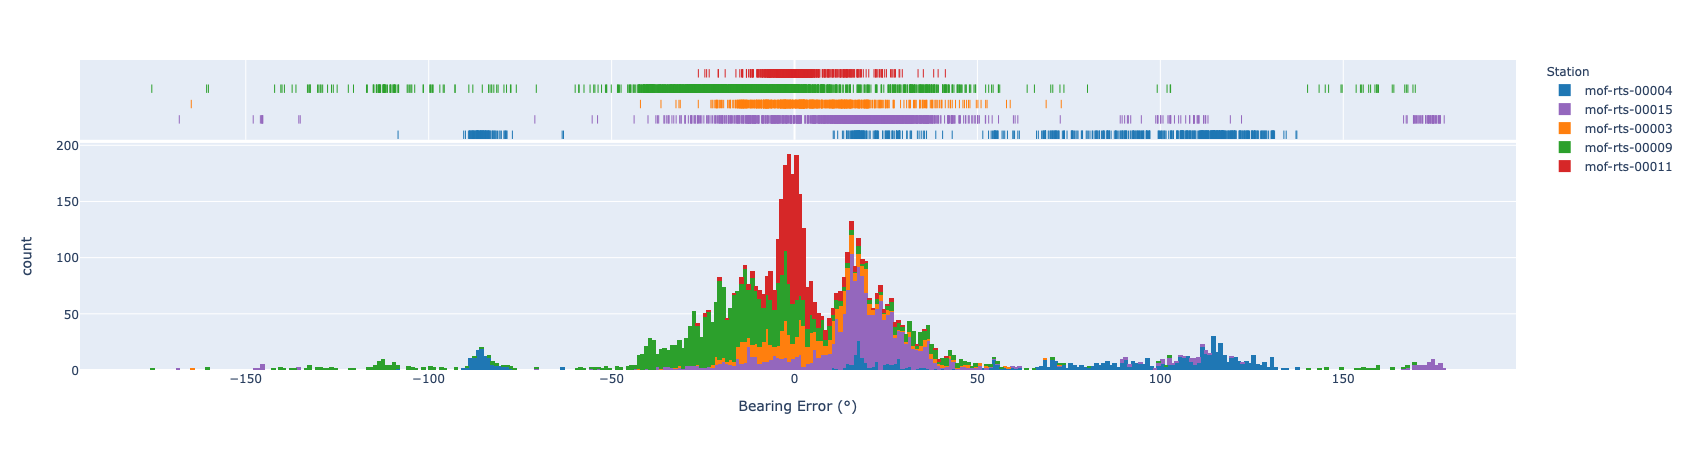

In [4]:
fig = px.histogram(
    trackit, 
    x="bearing_error", 
    color="Station", 
    marginal="rug", 
    labels={
        "bearing_error": "Bearing Error (°)",
    },
    color_discrete_map={
        "mof-rts-00003": "#ff7f0e", 
        "mof-rts-00004": "#1f77b4", 
        "mof-rts-00009": "#2ca02c", 
        "mof-rts-00011": "#d62728", 
        "mof-rts-00015": "#9467bd", 
    },
    nbins=360,
)
fig.write_image(
    "fig/tRackIT-bearing_error.pdf",
    width=500,
    height=500,)
fig.show()

In [5]:
trackit["bearing_error"].describe()

count    6292.000000
mean        8.895546
std        43.579766
min      -175.684215
25%       -11.729375
50%         1.340058
75%        20.440728
max       177.588251
Name: bearing_error, dtype: float64

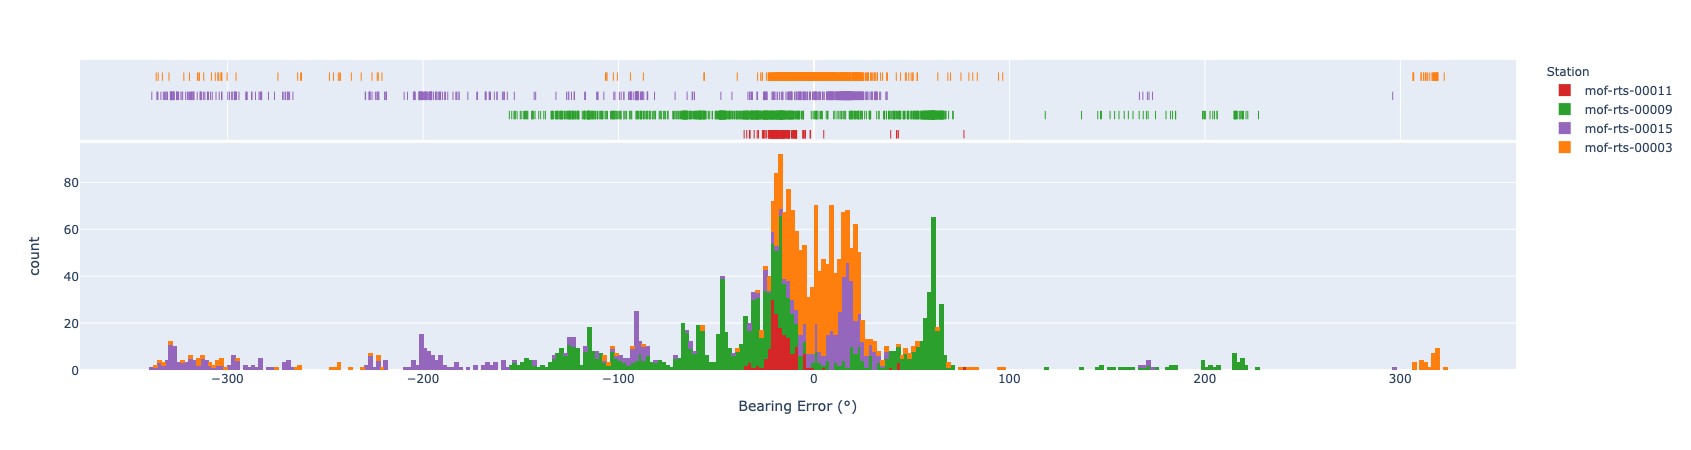

In [6]:
fig2 = px.histogram(
    rteu, 
    x="bearing_error", 
    color="Station", 
    marginal="rug", 
    labels={
        "bearing_error": "Bearing Error (°)",
    },
    color_discrete_map={
        "mof-rts-00003": "#ff7f0e", 
        "mof-rts-00004": "#1f77b4", 
        "mof-rts-00009": "#2ca02c", 
        "mof-rts-00011": "#d62728", 
        "mof-rts-00015": "#9467bd", 
    },
    nbins=360,
)
fig2.write_image(
    "fig/rteu-bearing_error.pdf",
    width=500,
    height=500,
)
fig2.show()

In [7]:
rteu["bearing_error"].describe()

count    2728.000000
mean      -26.557356
std        95.428497
min      -338.773413
25%       -46.173648
50%       -11.306477
75%        15.429016
max       322.394099
Name: bearing_error, dtype: float64

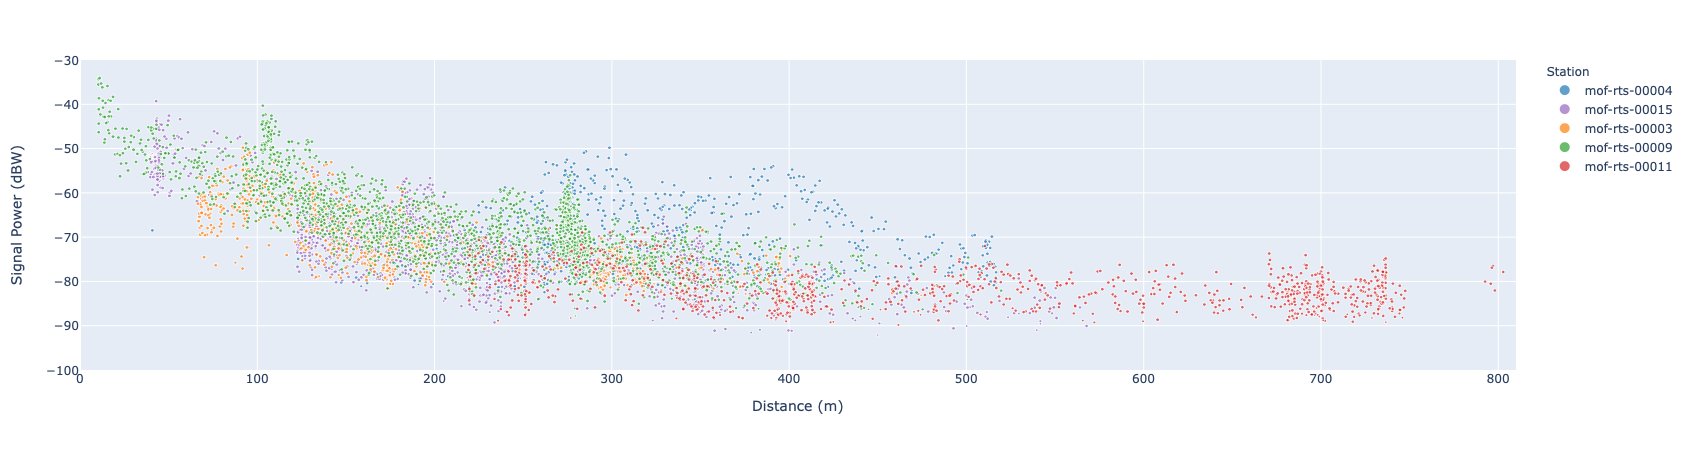

In [8]:
fig = px.scatter(
    trackit,
    x="distance",
    y="max_dB",
    labels={
        "max_dB": "Signal Power (dBW)",
        "distance": "Distance (m)",
    },
    color="Station",
    size_max=3.0,
    color_discrete_map={
        "mof-rts-00003": "#ff7f0e", 
        "mof-rts-00004": "#1f77b4", 
        "mof-rts-00009": "#2ca02c", 
        "mof-rts-00011": "#d62728", 
        "mof-rts-00015": "#9467bd", 
    },
    size="Duration",
    render_mode="svg",
)
fig.update_xaxes(range=[0, 810])
fig.update_yaxes(range=[-100, -30])
fig.write_image(
    "fig/tRackIT-power_distance.pdf",
    width=500,
    height=500,
)
fig.show()

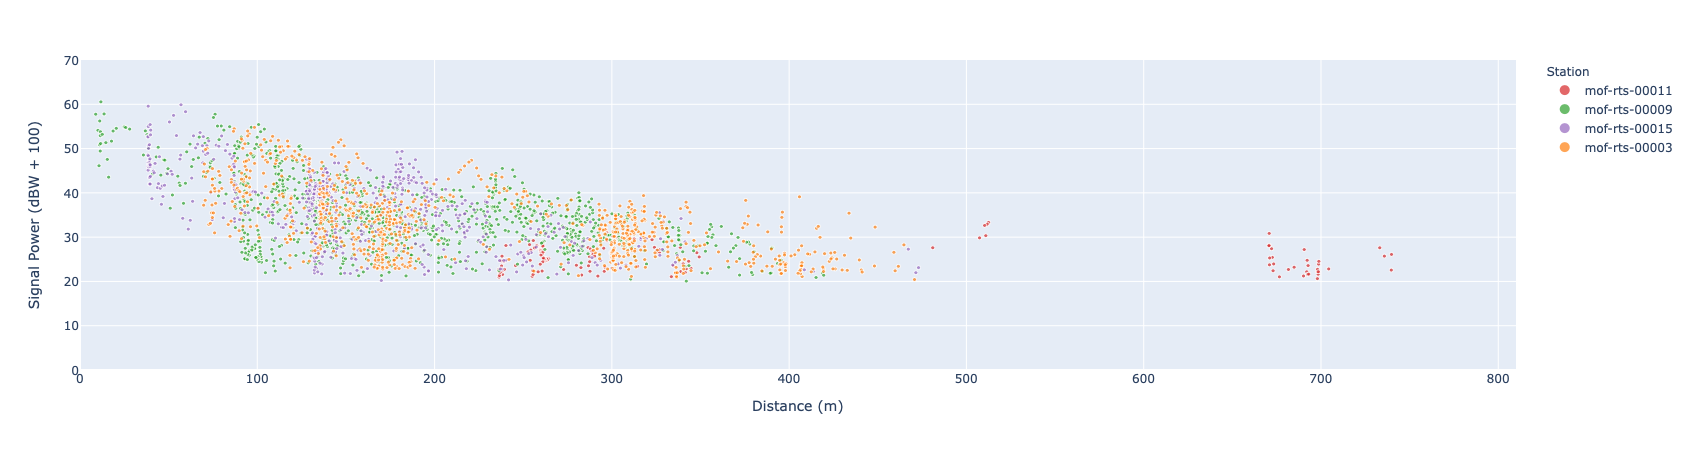

In [9]:
rteu["Duration"] = 0.02
fig = px.scatter(
    rteu,
    x="distance",
    y="max_dB",
    labels={
        "max_dB": "Signal Power (dBW + 100)",
        "distance": "Distance (m)",
    },
    color_discrete_map={
        "mof-rts-00003": "#ff7f0e", 
        "mof-rts-00004": "#1f77b4", 
        "mof-rts-00009": "#2ca02c", 
        "mof-rts-00011": "#d62728", 
        "mof-rts-00015": "#9467bd", 
    },
    color="Station",
    size_max=3.0,
    size="Duration",
    render_mode="svg",
)
fig.update_xaxes(range=[0, 810])
fig.update_yaxes(range=[0, 70])
fig.write_image(
    "fig/rteu-power_distance.pdf",
    width=500,
    height=500,
)
fig.show()

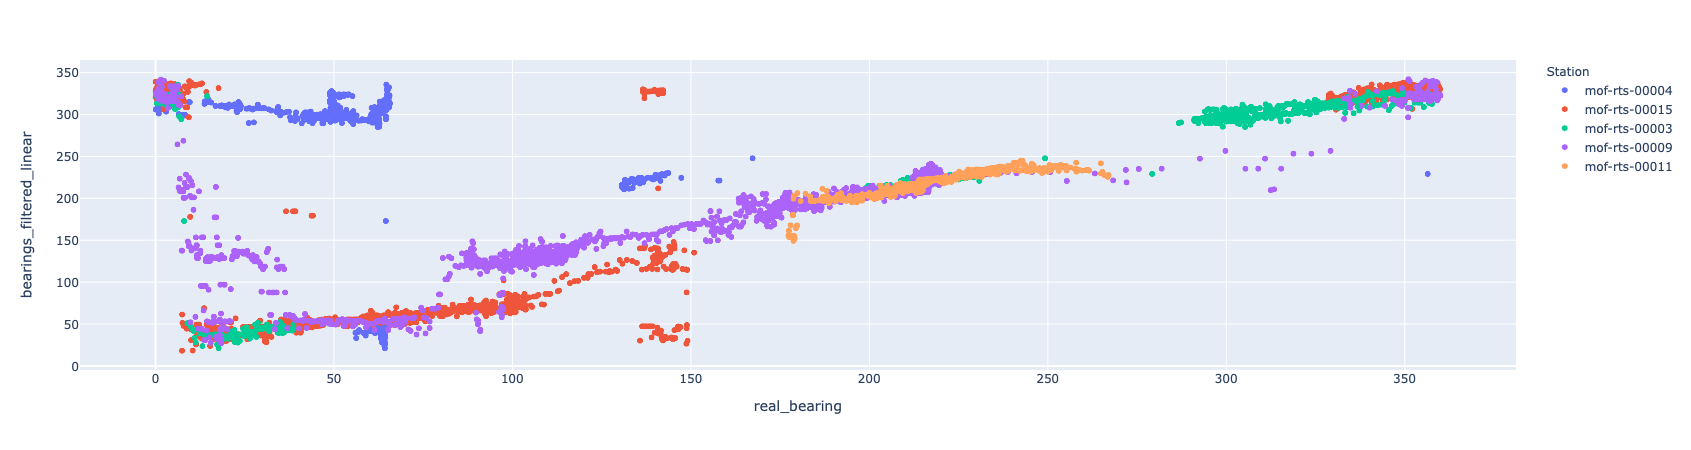

In [10]:
px.scatter(
    trackit,
    x="real_bearing",
    y="bearings_filtered_linear",
    color="Station",
)

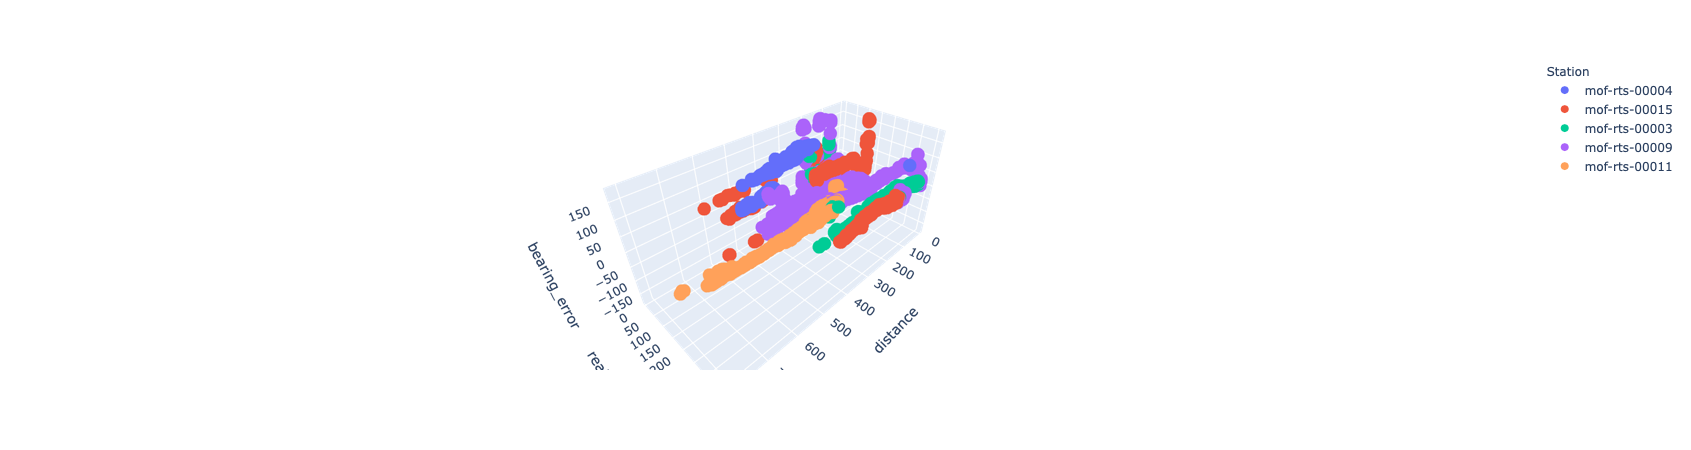

In [11]:
px.scatter_3d(
    trackit,
    y="real_bearing",
    x="distance",
    z="bearing_error",
    color="Station",
)